<a href="https://colab.research.google.com/github/RumethR/Gait_Analysis_wSmartwatch/blob/master/WISDM_w_Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os

accelerometer_data_file_path = '/content/drive/MyDrive/Implementation/watch/accel'
acc_files = os.listdir(accelerometer_data_file_path)
print(acc_files[0]) #Note that this won't print the first file in the directory, but the list has all files

gyroscope_data_file_path = '/content/drive/MyDrive/Implementation/watch/gyro'
gyro_files = os.listdir(gyroscope_data_file_path) #Note that the list contains 52 files because the first one is a .DS_Store file
print(gyro_files[0])

data_1626_accel_watch.txt
data_1629_gyro_watch.txt


In [18]:
#Map respective gyro file for the subject for the selected acc file
wisdm_dataset = {}

for acc_file in acc_files:
  #get the subject_id
  acc_file_name = acc_file.split("_") #The second index will contain the subject_id
  for gyro_file in gyro_files:
    gyro_file_name = gyro_file.split("_")
    if acc_file_name[1] == gyro_file_name[1]:
      wisdm_dataset[acc_file] = gyro_file
      gyro_files.remove(gyro_file)

print(wisdm_dataset)

{'data_1626_accel_watch.txt': 'data_1626_gyro_watch.txt', 'data_1631_accel_watch.txt': 'data_1631_gyro_watch.txt', 'data_1605_accel_watch.txt': 'data_1605_gyro_watch.txt', 'data_1608_accel_watch.txt': 'data_1608_gyro_watch.txt', 'data_1650_accel_watch.txt': 'data_1650_gyro_watch.txt', 'data_1600_accel_watch.txt': 'data_1600_gyro_watch.txt', 'data_1623_accel_watch.txt': 'data_1623_gyro_watch.txt', 'data_1612_accel_watch.txt': 'data_1612_gyro_watch.txt', 'data_1620_accel_watch.txt': 'data_1620_gyro_watch.txt', 'data_1637_accel_watch.txt': 'data_1637_gyro_watch.txt', 'data_1618_accel_watch.txt': 'data_1618_gyro_watch.txt', 'data_1633_accel_watch.txt': 'data_1633_gyro_watch.txt', 'data_1635_accel_watch.txt': 'data_1635_gyro_watch.txt', 'data_1611_accel_watch.txt': 'data_1611_gyro_watch.txt', 'data_1619_accel_watch.txt': 'data_1619_gyro_watch.txt', 'data_1601_accel_watch.txt': 'data_1601_gyro_watch.txt', 'data_1614_accel_watch.txt': 'data_1614_gyro_watch.txt', 'data_1616_accel_watch.txt': '

In [19]:
def format_and_segment_data(acc_data, gyro_data):
    def round_to_10_seconds(timestamp):
        return timestamp - (timestamp % 10**10)  # 10 seconds in nanoseconds

    def format_data(raw_data):
        formatted_data = []
        for entry in raw_data:
            split_entry = entry[:-1].split(',')
            split_entry[2] = int(split_entry[2])
            for index in range(3, len(split_entry)):
                split_entry[index] = float(split_entry[index])
            formatted_data.append(split_entry)
        return formatted_data

    def segment_data(formatted_data):
        segmented_data = {}
        for line in formatted_data:
            if line[1] == "A": #We are only using the walking
                rounded_time = round_to_10_seconds(line[2])
                segment_start = rounded_time
                segment_end = rounded_time + 10**10  # 10 seconds in nanoseconds

                if segment_start not in segmented_data:
                    segmented_data[segment_start] = []

                #Sampling rate for the WISDM dataset is 20Hz. This is make sure we have mathematically correct number of readings
                if(len(segmented_data[segment_start]) < 200):
                  segmented_data[segment_start].append(line)
            else:
                break

        # Deleting first and last keys to avoid segments that don't contain a full 10 seconds of data
        if segmented_data:
            first_key = next(iter(segmented_data))
            last_key = list(segmented_data.keys())[-1]
            del segmented_data[first_key]
            del segmented_data[last_key]

        return segmented_data

    acc_formatted_data = format_data(acc_data)
    gyro_formatted_data = format_data(gyro_data)

    acc_segmented = segment_data(acc_formatted_data)
    gyro_segmented = segment_data(gyro_formatted_data)

    # Check if dictionaries have the same keys
    if set(acc_segmented.keys()) == set(gyro_segmented.keys()):
      print("The dictionaries have the same keys.")
    else:
      print("The dictionaries have different keys.")
      # If the dictionaries don't have the same keys, use a set to make refs
      # matched_timestamps = set(set1_acc_segmented_data.keys()).intersection(set1_gyro_segmented_data.keys())
      # print(len(matched_timestamps))

    return acc_segmented, gyro_segmented

# Assuming you have acc_data and gyro_data ready
set1_acc_file_path = '/content/drive/MyDrive/Implementation/watch/accel/data_1626_accel_watch.txt'
set1_gyro_file_path = '/content/drive/MyDrive/Implementation/watch/gyro/data_1626_gyro_watch.txt'

set2_acc_file_path = '/content/drive/MyDrive/Implementation/watch/accel/data_1627_accel_watch.txt'
set2_gyro_file_path = '/content/drive/MyDrive/Implementation/watch/gyro/data_1627_gyro_watch.txt'

def read_files(acc_file_path, gyro_file_path):
  #reads the files from the drive and split them into seperate lines
  with open(acc_file_path, 'r') as file:
    acc_content = file.read()
    acc_data = acc_content.splitlines()
    print(acc_data[0])

  with open(gyro_file_path, 'r') as file:
    gyro_content = file.read()
    gyro_data = gyro_content.splitlines()
    print(gyro_data[0])

  return format_and_segment_data(acc_data, gyro_data)

set1_acc_segmented_data, set1_gyro_segmented_data = read_files(set1_acc_file_path, set1_gyro_file_path)
set2_acc_segmented_data, set2_gyro_segmented_data = read_files(set2_acc_file_path, set2_gyro_file_path)

1626,A,372824809784090,7.230639,-0.8752304,-0.18510172;
1626,A,372824859284090,0.23433474,0.58682114,2.0321581;
The dictionaries have the same keys.
1627,A,216836851128086,2.726846,0.23732524,-4.664354;
1627,A,216836900628086,1.0744395,2.2197602,0.5899488;
The dictionaries have the same keys.


In [20]:
# Combine the values from both acc and gyro into one timestamp
def combine_data(acc_data, gyro_data):
  # Current format {(Timestamp): [[sensorX, sensorY, sensorZ], [sensorX, sensorY, sensorZ] ... 198 ]}
  # Both dictionaries has the same key (Timestamp).
  combined_map = {}
  for key, value in acc_data.items():
    acc_values = acc_data[key]
    gyro_values = gyro_data[key]

    #create an empty array for each timestep. and then add the combined data to that array
    combined_map[key] = []

    for x in acc_values:
      #check if there is a corresponding timestamp in the gyro_values for each acc_value
      for y in gyro_values:
        x[2] = y[2]
        # if the timestamps are equal create an array with both the values
        array_all = [x[3], x[4], x[5], y[3], y[4], y[5]] #include x[0] if subject_id is needed in the future
        combined_map[key].append(array_all)
        break

  return combined_map

set1_combined = combine_data(set1_acc_segmented_data, set1_gyro_segmented_data)
set2_combined = combine_data(set2_acc_segmented_data, set2_gyro_segmented_data)

In [21]:
# Create pairs and labels
# {timestamp: [[[], [], []]],[]}
# set1_combined, set2_combined
import random
import numpy as np

def create_pairs():
  pairs = []
  labels = []
  random_keys = set()

  # Run a loop for 8 times
  for i in range(0,9):
    #select a random key from the set
    random_pair = []

    while True:
      random_key = random.choice(list(set1_combined.keys()))
      if random_key not in random_keys:
        random_keys.add(random_key)
        random_pair.append(set1_combined[random_key])
        break

    while True:
      random_key = random.choice(list(set2_combined.keys()))
      if random_key not in random_keys:
        random_keys.add(random_key)
        random_pair.append(set2_combined[random_key])
        break

    labels.append(0) #because the two sequences are from two different people
    pairs.append(random_pair)

  set1_keys = set(set1_combined.keys())
  remaining_keys = set1_keys.difference(random_keys)

  for i in range(len(pairs), len(set1_combined)):
    true_pair = []
    for i in remaining_keys:
      if len(true_pair) < 2:
        true_pair.append(set1_combined[i])
      else:
        pairs.append(true_pair)
        labels.append(1)
        break

  print(len(pairs))
  print(labels)
  return pairs, labels

pairs, labels = create_pairs()


17
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [22]:
from sklearn.model_selection import train_test_split

# Shuffle pairs and labels, so that the model does not lean any patterns
# Combine pairs and labels
combined_data = list(zip(pairs, labels))

# Shuffle the combined data
random.shuffle(combined_data)

# Unpack the shuffled data back into pairs and labels
shuffled_pairs, shuffled_labels = zip(*combined_data)

train_sequences, val_sequences, train_labels, val_labels = train_test_split(shuffled_pairs, shuffled_labels, test_size=0.2, random_state=42)

print("Number of training data sets: ", len(train_sequences))
print("Each set has an array of length: ", len(train_sequences[0]))
print("One of those two elements in the array contain", len(train_sequences[0][0]), "data points (20hz polling rate, 10 seconds of data).")
print("Each data point has", len(train_sequences[0][0][0]), "elements. 3 accelerometer values and 3 gyroscope values")

train_pairs = np.array(train_sequences)
val_pairs = np.array(val_sequences)

train_labels = np.array(train_labels)
print(train_labels)
val_labels = np.array(val_labels)

print(train_labels.shape)

Number of training data sets:  13
Each set has an array of length:  2
One of those two elements in the array contain 200 data points (20hz polling rate, 10 seconds of data).
Each data point has 6 elements. 3 accelerometer values and 3 gyroscope values
[1 1 0 1 0 0 1 0 0 0 1 1 0]
(13,)


Creating pairs of data for the Simaese network. Ideally the data should look something like this.

Each subject has 17 10-second data instances. The last element in the 2D-Array indicates weather the data is from the same person or not.

1 = Same person
0 = Different people

> [Timestamp] : [[accX, accY, accZ], [gyroX, gyroY, gyroZ], [1]]

> [Timestamp] : [[accX, accY, accZ], [gyroX, gyroY, gyroZ], [0]]






In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Siamese model for sequence data
def create_siamese_network(input_shape):
    # Define the base LSTM network (twin network)
    base_network = models.Sequential([
        layers.Bidirectional(layers.LSTM(64, input_shape=input_shape, return_sequences=True)),
        layers.LSTM(256),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu')
    ])

    # Inputs for two sequences of accelerometer and gyroscope data
    input_a = tf.keras.Input(shape=input_shape)
    input_b = tf.keras.Input(shape=input_shape)

    # Process each sequence through the twin network
    processed_a = base_network(input_a)
    processed_b = base_network(input_b)

    # Calculate absolute difference between the processed outputs
    distance = tf.keras.layers.Lambda(lambda x: tf.abs(x[0] - x[1]))([processed_a, processed_b])

    # Output layer for similarity prediction
    output = layers.Dense(1, activation='sigmoid')(distance)

    # Siamese model
    siamese_model = tf.keras.Model(inputs=[input_a, input_b], outputs=output)
    return siamese_model

# Define input shape (adjust based on your sequence length and sensor data)
input_shape = (200, 6)  # Replace with your input shape
siamese_network = create_siamese_network(input_shape)

# Compile the model
siamese_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
siamese_network.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 200, 6)]             0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 200, 6)]             0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 64)                   471744    ['input_5[0][0]',             
                                                                     'input_6[0][0]']             
                                                                                                  
 lambda_2 (Lambda)           (None, 64)                   0         ['sequential_2[0][0]',  

In [24]:
# Train the model.
history = siamese_network.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],  # Training pairs
    train_labels,  # Training labels
    epochs=30,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels)  # Validation data
)


Epoch 1/30
1/1 [==============================] - 16s 16s/step - loss: 0.6971 - accuracy: 0.5385 - val_loss: 0.7044 - val_accuracy: 0.2500
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 0.6908 - accuracy: 0.5385 - val_loss: 0.6549 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 1s 1s/step - loss: 0.6485 - accuracy: 0.7692 - val_loss: 0.6204 - val_accuracy: 0.7500
Epoch 4/30
1/1 [==============================] - 1s 1s/step - loss: 0.6130 - accuracy: 0.7692 - val_loss: 0.5803 - val_accuracy: 0.7500
Epoch 5/30
1/1 [==============================] - 1s 1s/step - loss: 0.5748 - accuracy: 0.7692 - val_loss: 0.5376 - val_accuracy: 0.7500
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: 0.5276 - accuracy: 0.7692 - val_loss: 0.4990 - val_accuracy: 0.7500
Epoch 7/30
1/1 [==============================] - 1s 1s/step - loss: 0.4744 - accuracy: 0.7692 - val_loss: 0.4703 - val_accuracy: 0.5000
Epoch 8/30
1/1 [=======================

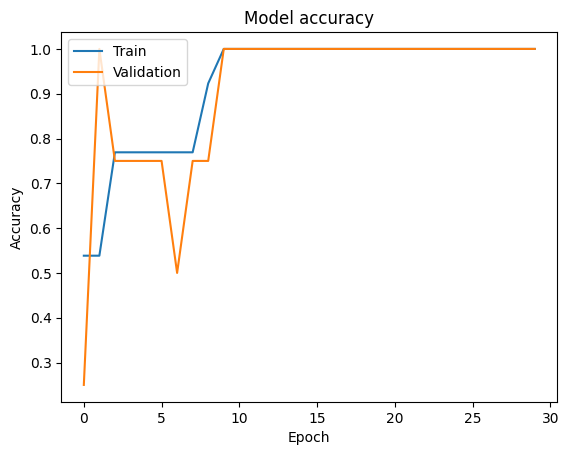

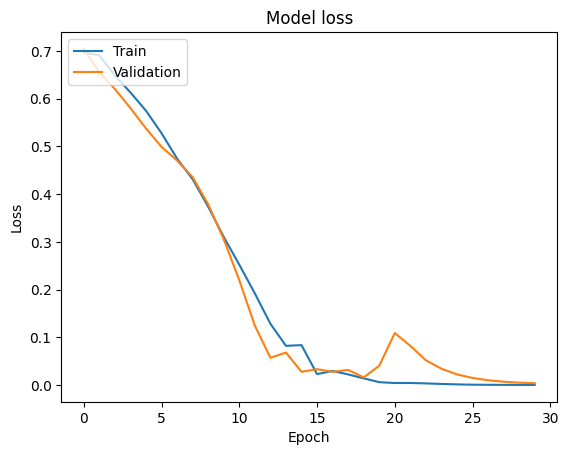

In [25]:
# Evaluate the LSTM model
import matplotlib.pyplot as plt

# Assuming history contains training and validation metrics

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
# Create the CNN model
def create_cnn_siamese_network(input_shape):
    # Define the base LSTM network (twin network)
    base_network = models.Sequential([
        layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        #layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5)
    ])

    # Inputs for two sequences of accelerometer and gyroscope data
    input_a = tf.keras.Input(shape=input_shape)
    input_b = tf.keras.Input(shape=input_shape)

    # Process each sequence through the twin network
    processed_a = base_network(input_a)
    processed_b = base_network(input_b)

    # Calculate absolute difference between the processed outputs
    distance = tf.keras.layers.Lambda(lambda x: tf.abs(x[0] - x[1]))([processed_a, processed_b])

    # Output layer for similarity prediction
    output = layers.Dense(1, activation='sigmoid')(distance)

    # Siamese model
    siamese_model = tf.keras.Model(inputs=[input_a, input_b], outputs=output)
    return siamese_model

# Define input shape (adjust based on your sequence length and sensor data)
input_shape = (200, 6)  # Replace with your input shape
cnn_siamese_network = create_cnn_siamese_network(input_shape)

# Compile the model
cnn_siamese_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_siamese_network.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 200, 6)]             0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 200, 6)]             0         []                            
                                                                                                  
 sequential_3 (Sequential)   (None, 256)                  785440    ['input_7[0][0]',             
                                                                     'input_8[0][0]']             
                                                                                                  
 lambda_3 (Lambda)           (None, 256)                  0         ['sequential_3[0][0]',  

In [27]:
# Train the cnn model.
cnn_history = cnn_siamese_network.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],  # Training pairs
    train_labels,  # Training labels
    epochs=30,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels)  # Validation data
)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7292 - accuracy: 0.6154 - val_loss: 1.0286 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 62ms/step - loss: 5.8807 - accuracy: 0.4615 - val_loss: 0.5921 - val_accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 81ms/step - loss: 0.9860 - accuracy: 0.6154 - val_loss: 0.3904 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 64ms/step - loss: 1.9613 - accuracy: 0.5385 - val_loss: 0.3250 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 65ms/step - loss: 1.8387 - accuracy: 0.5385 - val_loss: 0.2445 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 89ms/step - loss: 1.1431 - accuracy: 0.5385 - val_loss: 0.2480 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 83ms/step - loss: 0.2241 - accuracy: 1.0000 - val_loss: 0.3062 - val_accuracy: 0.7500
Epoch 8/30
1/1 [=============

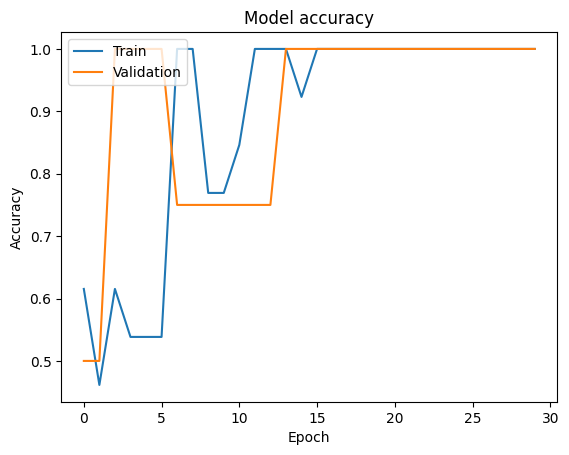

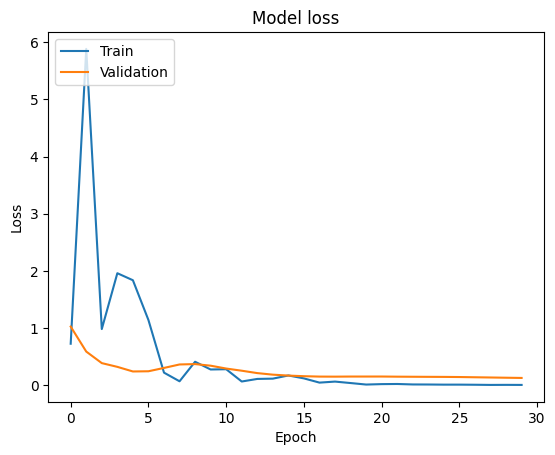

In [28]:
# Plot training & validation accuracy values
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
# Save the entire model to a HDF5 file (including architecture, weights, and training configuration)
siamese_network.save('siamese_model.tflite')

In [30]:
# Compress the folder
!zip -r /content/folder_name.zip /content/siamese_model.tflite

# Generate a download link
from google.colab import files
files.download("/content/folder_name.zip")

  adding: content/siamese_model.tflite/ (stored 0%)
  adding: content/siamese_model.tflite/assets/ (stored 0%)
  adding: content/siamese_model.tflite/fingerprint.pb (stored 0%)
  adding: content/siamese_model.tflite/saved_model.pb (deflated 90%)
  adding: content/siamese_model.tflite/keras_metadata.pb (deflated 93%)
  adding: content/siamese_model.tflite/variables/ (stored 0%)
  adding: content/siamese_model.tflite/variables/variables.index (deflated 66%)
  adding: content/siamese_model.tflite/variables/variables.data-00000-of-00001 (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>